In [1]:
#%% Libraries
import torch
from matplotlib import pyplot as plt

#### Ex. 1: A linear approach

In [2]:
class Linear(torch.nn.Module):
    def __init__(self):
        super().__init__()
        w = torch.tensor([[1.0], [3.0]])  
        b = torch.tensor([0.0])  
        self.w = torch.nn.Parameter(w, requires_grad=True)
        self.b = torch.nn.Parameter(b, requires_grad=True)

    def forward(self, x):        
        return x.T @ self.w + self.b  

# initialize model
model = Linear()
input_features = [torch.tensor([[1.0], [0.5]], requires_grad=False), 
                  torch.tensor([[0.1], [-0.3]], requires_grad=False)]
output_features = []

for x in input_features:
    y_hat = model.forward(x)
    output_features.append(y_hat)

print(output_features)

[tensor([[2.5000]], grad_fn=<AddBackward0>), tensor([[-0.8000]], grad_fn=<AddBackward0>)]


In [3]:
# Ex. 1.2


def classify(y_hat):
    return 1 if y_hat.item() > 0 else -1

classifications = []
for y_hat in output_features:
    C = classify(y_hat)
    classifications.append(C)

print(classifications)


[1, -1]


Text(0.5, 1.0, 'Classify function')

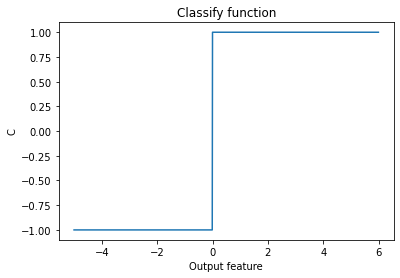

In [4]:
# Ex. 1.2 cont plot of classify functions


x_axis = torch.arange(-5, 6, 0.01)
y_axis = []
for x_value in x_axis:
    y_value = classify(x_value)
    y_axis.append(y_value)

plt.plot(x_axis, y_axis)
plt.xlabel("Output feature")
plt.ylabel("C")
plt.title("Classify function")


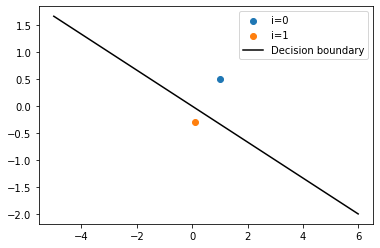

In [5]:
# Ex. 1.3:

def decision_boundary(x0, w0, w1, b):
    return -(x0*w0 + b) / w1

for i, x in enumerate(input_features):
    plt.scatter(x[0], x[1], label=f"i={i}")

# plt.scatter(x_2[0], x_2[1])

xaxis = torch.arange(-5, 6, step=0.01)

w0 = model.w[0].detach() 
w1 = model.w[1].detach()
b = model.b.detach()
plt.plot(xaxis, decision_boundary(xaxis, w0, w1, b), 'black', label="Decision boundary")


plt.legend()
plt.plot()
plt.show()


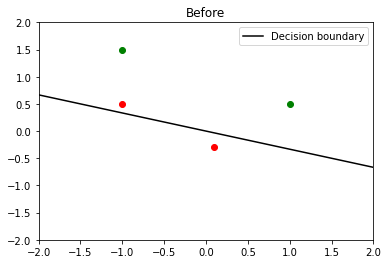

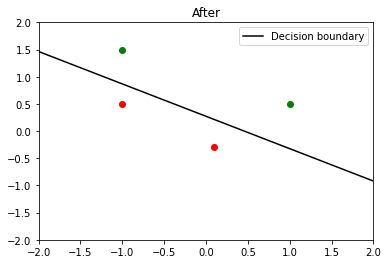

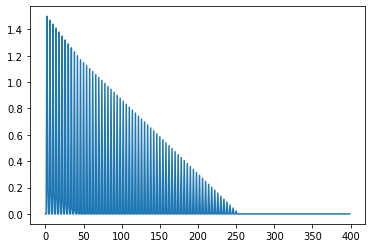

In [6]:

# Ex 1.4:

epochs = 100
# initialize model
model = Linear()
input_features = [torch.tensor([[1.0], [0.5]], requires_grad=False), 
                torch.tensor([[-1.0], [1.5]], requires_grad=False),
                torch.tensor([[-1.0], [0.5]], requires_grad=False),
                torch.tensor([[0.1], [-0.3]], requires_grad=False)]

labels = [torch.tensor([1.0]),torch.tensor([1.0]), torch.tensor([-1.0]), torch.tensor([-1.0])]
labels = torch.cat(labels)
# we use hinge loss for training SVM 
# note that other existing classification loss may be suitable too
# loss_function = torch.nn.MarginRankingLoss(margin=1.0)

def loss_function(y_hat, C): #hinge loss function
    return torch.max(torch.tensor(0.0), 1 - C * y_hat)


learning_rate = 0.01


def plot_boundary_and_input_features(model, input_features, labels,title):
    for x, y in zip(input_features, labels):
        if y.item() == -1:
            plt.scatter(x[0], x[1], c='red')
        elif y.item() == 1:
            plt.scatter(x[0], x[1], c='green')

    xaxis = torch.arange(-5, 6, step=0.01)

    w0 = model.w[0].detach()
    w1 = model.w[1].detach()
    b = model.b.detach()
    plt.plot(xaxis, decision_boundary(xaxis, w0, w1, b), 'black', label="Decision boundary")

    plt.xlim(-2, 2)
    plt.ylim(-2, 2)
    if title:
        plt.title(title)
    plt.legend()
    plt.show()

def optimize_weights(model, learning_rate):
    w = model.w
    b = model.b
    w_grad = model.w.grad
    b_grad = model.b.grad
    
    # update the weights here with learning rate
    w_new = w - learning_rate * w_grad
    b_new = b - learning_rate * b_grad

    # update the model weight
    model.w.data = w_new
    model.b.data = b_new 

losses = []

plot_boundary_and_input_features(model, input_features, labels, title="Before")
plt.savefig("before.jpg", dpi=600)
for epoch in range(epochs):

    # c_hats = []
    for x, y in zip(input_features, labels):

        # apply model
        y_hat = model.forward(x)
        
        loss = loss_function(y_hat, y)
        
        losses.append(loss.detach().item())

        # zero_grad
        model.zero_grad()
        # perform backward
        loss.backward()

        # optimize weights
        optimize_weights(model, learning_rate)



plot_boundary_and_input_features(model, input_features, labels, "After")
plt.plot(losses)
plt.show()        


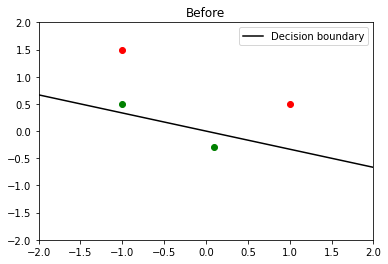

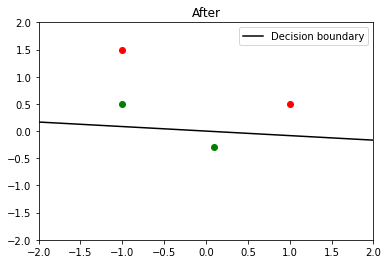

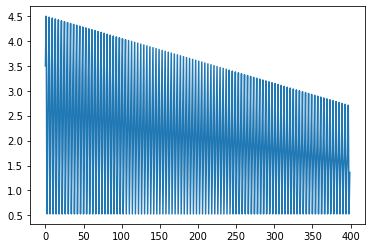

In [9]:

# Ex 1.5:

epochs = 100
# initialize model
model = Linear()
input_features = [torch.tensor([[1.0], [0.5]], requires_grad=False), 
                torch.tensor([[-1.0], [1.5]], requires_grad=False),
                torch.tensor([[-1.0], [0.5]], requires_grad=False),
                torch.tensor([[0.1], [-0.3]], requires_grad=False)]

labels = [torch.tensor([1.0]),torch.tensor([1.0]), torch.tensor([-1.0]), torch.tensor([-1.0])]
labels = torch.cat(labels)
labels = -labels
# we use hinge loss for training SVM 
# note that other existing classification loss may be suitable too
# loss_function = torch.nn.MarginRankingLoss(margin=1.0)

def loss_function(y_hat, C):
    return torch.max(torch.tensor(0.0), 1 - C * y_hat)


learning_rate = 0.01


def plot_boundary_and_input_features(model, input_features, labels,title):
    for x, y in zip(input_features, labels):
        if y.item() == -1:
            plt.scatter(x[0], x[1], c='red')
        elif y.item() == 1:
            plt.scatter(x[0], x[1], c='green')

    xaxis = torch.arange(-5, 6, step=0.01)

    w0 = model.w[0].detach()
    w1 = model.w[1].detach()
    b = model.b.detach()
    plt.plot(xaxis, decision_boundary(xaxis, w0, w1, b), 'black', label="Decision boundary")

    plt.xlim(-2, 2)
    plt.ylim(-2, 2)
    if title:
        plt.title(title)
    plt.legend()
    plt.show()

def optimize_weights(model, learning_rate):
    w = model.w
    b = model.b
    w_grad = model.w.grad
    b_grad = model.b.grad
    
    # update the weights here with learning rate
    w_new = w - learning_rate * w_grad
    b_new = b - learning_rate * b_grad

    # update the model weight
    model.w.data = w_new
    model.b.data = b_new 

losses = []

plot_boundary_and_input_features(model, input_features, labels, title="Before")
plt.savefig("before.jpg", dpi=600)
for epoch in range(epochs):

    # c_hats = []
    for x, y in zip(input_features, labels):

        # apply model
        y_hat = model.forward(x)
        
        loss = loss_function(y_hat, y)
        
        losses.append(loss.detach().item())

        # zero_grad
        model.zero_grad()
        # perform backward
        loss.backward()

        # optimize weights
        optimize_weights(model, learning_rate)



plot_boundary_and_input_features(model, input_features, labels, "After")
plt.plot(losses)
plt.show()        
